In [1]:
!pip install pandas-profiling==3.6.2
!pip install pandas==1.2.3
!pip install matplotlib

1. Import and read the csv file and turn it into a dataframe. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Dataset3.csv')

2. Explore the data in df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         222 non-null    int64 
 1   Title      222 non-null    object
 2   Salary     222 non-null    int64 
 3   Education  222 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


In [5]:
df.describe()

,ID,Salary
count,2.220000e+02,222.000000
mean,5.154113e+08,104760.468468
std,2.874049e+08,46406.757013
min,1.146487e+07,58622.000000
25%,2.652474e+08,72904.500000
50%,5.172096e+08,88735.500000
75%,7.723461e+08,120116.250000
max,9.999280e+08,397480.000000


I need to drop the ID number columns and add a column to replace that column due to privacy 

In [6]:
df['ID_replacement'] = np.arange(1, len(df) + 1)

In [7]:
df = df.drop(columns=['ID'])

In [8]:
df.head()

,Title,Salary,Education,ID_replacement
0,Business Intelligence Analyst,81718,B,1
1,Business Intelligence Analyst,59179,B,2
2,Business Intelligence Developer,109032,B,3
3,Business Intelligence Developer,101337,B,4
4,Business Intelligence Developer,109743,B,5


In [9]:
df['Salary'].min()

58622

In [10]:
df['Salary'].max()

397480

In [11]:
df['Title'].value_counts()

EHR Application Analyst      42
Tech Analyst                 17
Systems Engineer             11
Service Desk Analyst         10
EPIC Principal Trainer        9
                             ..
Mgr Service Desk              1
Database Administrator        1
Dir IT EPIC Solutions         1
Mgr System Administration     1
IT Security Architect         1
Name: Title, Length: 75, dtype: int64

3. Cleaning and shaping the dataset

> After looking at the dataset we see that for education, it is put into the first letter of their education status. H is highschool, B is for bacholers, and M is for masters. If a high school degree is 12 years, then a bacholers takes an average of 16 years to compleate and a masters is 18 total years of school. I will be creating a new column and putting in their number years of school for analysis. When it comes to their title, there is a range of titles given and there are 75 different titles. I will add a column later that is a grouping of the tites that show the diffrernt levels of position. For now I will check for NaNs and nulls, but this data looks clean so I doubt that there will be only be a few if any. 

In [12]:
# Check for NaN values
nan_count = df.isna().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


In [13]:
# Check for null values
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


4. Adding the columns

In [14]:
#adding the education_years column
df['Education_Years'] = df['Education'].map({'H': 12, 'B': 16, 'M': 18})

In [15]:
df.head()

,Title,Salary,Education,ID_replacement,Education_Years
0,Business Intelligence Analyst,81718,B,1,16
1,Business Intelligence Analyst,59179,B,2,16
2,Business Intelligence Developer,109032,B,3,16
3,Business Intelligence Developer,101337,B,4,16
4,Business Intelligence Developer,109743,B,5,16


In [16]:
# add the column that groups together the different titles to their most basic jobs
df['Title_Grouped'] = ''

In [17]:
for i, row in df.iterrows():
    title = row['Title']
    if 'Analyst' in title:
        df.at[i, 'Title_Grouped'] = 'Analyst'
    elif 'Developer' in title:
        df.at[i, 'Title_Grouped'] = 'Developer'
    elif 'Dir' in title:
        df.at[i, 'Title_Grouped'] = 'Director'
    elif 'Trainer' in title:
        df.at[i, 'Title_Grouped'] = 'Trainer'
    elif 'Mgr' in title:
        df.at[i, 'Title_Grouped'] = 'Mgr'
    elif 'Manager' in title:
        df.at[i, 'Title_Grouped'] = 'Manager'
    elif 'Engineer' in title:
        df.at[i, 'Title_Grouped'] = 'Engineer'
    elif 'Architect' in title:
        df.at[i, 'Title_Grouped'] = 'Architect'
        df.at[i, 'Title_Grouped'] = 'Engineer'
    elif 'Supv' in title:
        df.at[i, 'Title_Grouped'] = 'Supv'
    elif 'Administrator' in title:
        df.at[i, 'Title_Grouped'] = 'Administrator'
    elif 'IT Security' in title:
        df.at[i, 'Title_Grouped'] = 'IT Security'
    elif 'CI' in title:
        df.at[i, 'Title_Grouped'] = 'Upper Managment'
    elif 'CTO' in title:
        df.at[i, 'Title_Grouped'] = 'Upper Managment'
    else:
        df.at[i, 'Title_Grouped'] = 'Other'

In [18]:
df['Title_Grouped'].value_counts()

Analyst            107
Engineer            35
Mgr                 24
Director            14
Trainer             10
Other                8
Developer            8
Manager              5
Administrator        4
Upper Managment      3
Supv                 2
IT Security          2
Name: Title_Grouped, dtype: int64

There are multiple titles, like CTO and CIO, that should not be grouped together due to their job. For thoes I left their grouping as their job title. 

5. Check with df.info() that all columns have been added correctly.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            222 non-null    object
 1   Salary           222 non-null    int64 
 2   Education        222 non-null    object
 3   ID_replacement   222 non-null    int64 
 4   Education_Years  222 non-null    int64 
 5   Title_Grouped    222 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.5+ KB


6. Examine the data by finding percentages

In [20]:
education_counts = df['Education'].value_counts()
# Calculate the percentage of 'H' values
percentage_h = (education_counts['H'] / df.shape[0]) * 100
print(f"The percentage of data with 'H' in the 'Education' column is: {percentage_h}%")


The percentage of data with 'H' in the 'Education' column is: 32.88288288288289%


In [21]:
percentage_b = (education_counts['B'] / df.shape[0]) * 100
print(f"The percentage of data with 'B' in the 'Education' column is: {percentage_b}%")

The percentage of data with 'B' in the 'Education' column is: 59.009009009009006%


In [22]:
percentage_m = (education_counts['M'] / df.shape[0]) * 100
print(f"The percentage of data with 'M' in the 'Education' column is: {percentage_m}%")


The percentage of data with 'M' in the 'Education' column is: 8.108108108108109%


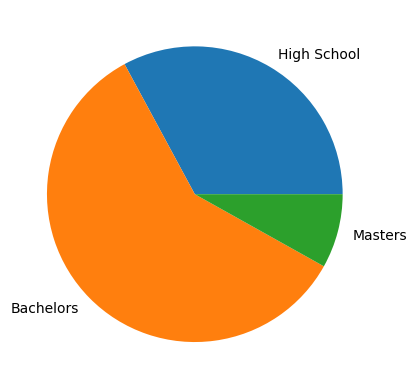

In [23]:
#making a pie chart to directly compair
# Data
labels = ['High School', 'Bachelors', 'Masters']
sizes = [percentage_h, percentage_b, percentage_m]

# Create pie chart
plt.pie(sizes, labels=labels)

# Show the chart
plt.show()

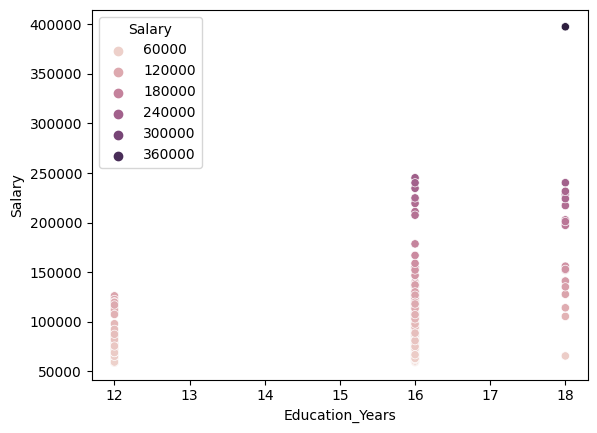

In [24]:
sns.scatterplot(x='Education_Years', y='Salary', data=df, hue='Salary')

# Display the plot
plt.show()

[Text(0.5, 0, 'Education Years'),
 Text(0, 0.5, 'Title Grouped'),
 Text(0.5, 1.0, 'Education Years vs Title Grouped')]

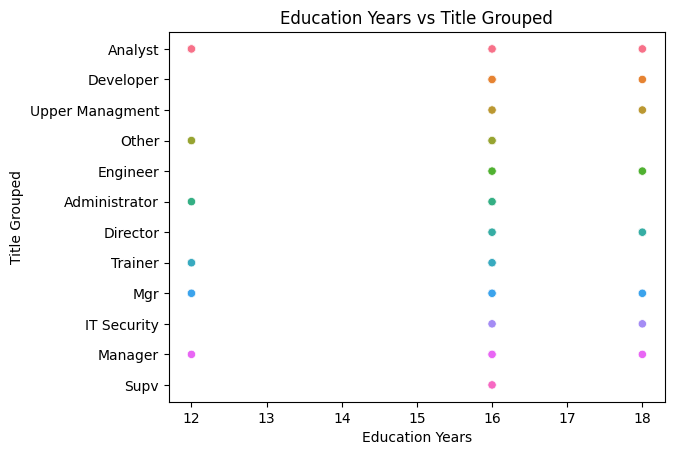

In [25]:
# create scatterplot
ax = sns.scatterplot(x = "Education_Years", y = "Title_Grouped", data = df, hue = "Title_Grouped", legend = False)

# set labels and title
ax.set(xlabel = "Education Years", ylabel = "Title Grouped", title = "Education Years vs Title Grouped")


In [26]:
max_salary = df['Salary'].max()
highest_paid_job = df[df['Salary'] == max_salary]['Title']
highest_paid_education = df[df['Salary'] == max_salary]['Education']

print(highest_paid_job.values[0], 'has the highest salary with a', highest_paid_education.values[0], 'degree')

CIO has the highest salary with a M degree


In [27]:
min_salary = df['Salary'].min()
lowest_paid_job = df[df['Salary'] == min_salary]['Title']
lowest_paid_education = df[df['Salary'] == min_salary]['Education']

print(lowest_paid_job.values[0], 'has the lowest salary with a', lowest_paid_education.values[0], 'degree')

EHR Application Analyst has the lowest salary with a H degree


In [28]:
# Calculate the average salary for each education type
avg_salary_by_education = df.groupby('Education')['Salary'].mean()

print(avg_salary_by_education)

Education
B    107844.763359
H     79986.835616
M    182784.500000
Name: Salary, dtype: float64


To find the correlation bewteen salary and education years, we will use .corr()

In [29]:
df['Salary']. corr(df['Education_Years'])

0.47359564223538253

We can see here that there is a stastistically significant and positive correlatio between salary and education level. 